# Inferential Statistics

In descriptive statistics, we are able to summarize the characteristics of the data at hand. Often times, we are interested in generalizing the observations of the data we have to a larger population. In other words, we would like to infer the characteristics of a larger population from the sample that we have.

![inference.png](images/inference.png)

How are we able to achieve this?
- The sample contains the  signal (e.g the estimate of the mean of the population) with noise that comes from 
uncertainty about the measurements
- Understanding the characteristics of the error/uncertainty will allow us to infer the estimates for the population from the sample 

---
# Modeling uncertainty

What are the characteristics of the uncertainty? We can model it by looking at the **accumulation of independent random deviations** from an initial value.

<img src="images/galton.gif" width=200>

Let us model this as a random walk
- We will start with a value that represents the true measurement (0)
- We then simulate the the errors that can change the value as a random choice that either increases (+1) or decreases (-1) at each step
- We will examine the final value resulting from the cumulative deviations at the end of a defined number of steps

Here, we start out with a base function `walk` that simulates the random choice of (+1) or (-1) at each step, then calculates the cumulative errors at the end of the defined number of steps

```
walk(steps = number of steps,
     prob = probability (default is 50:50)
```

In [1]:
library(tidyverse)

walk <- function(steps, prob = c(0.5,0.5)) {
    
    tibble(step=1:steps, 
           direction=sample(c(-1,1), # we use the sample function with 2 choices (-1 and +1)
           steps,             # steps = how many repetitions
           replace = TRUE,    
           prob = prob)) %>%  # prob = the probability between the choices (here it is 50:50)
    mutate(cumsum = cumsum(direction)) %>%                   # cumsum is function that cumulatively adds up the values at each step
    select(step, direction, cumsum) %>%
    return
    
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



We can take a look at a simulation of 100 steps with random deviation (+1 or -1) at each step

In [2]:
# walk 100 steps, 50/50 probability
walk_100 <- walk(100)

head(walk_100)
tail(walk_100)

step,direction,cumsum
<int>,<dbl>,<dbl>
1,1,1
2,-1,0
3,-1,-1
4,-1,-2
5,-1,-3
6,-1,-4


step,direction,cumsum
<int>,<dbl>,<dbl>
95,-1,-7
96,1,-6
97,1,-5
98,-1,-6
99,1,-5
100,-1,-6


We can visualize the path of the random walk after 100 steps

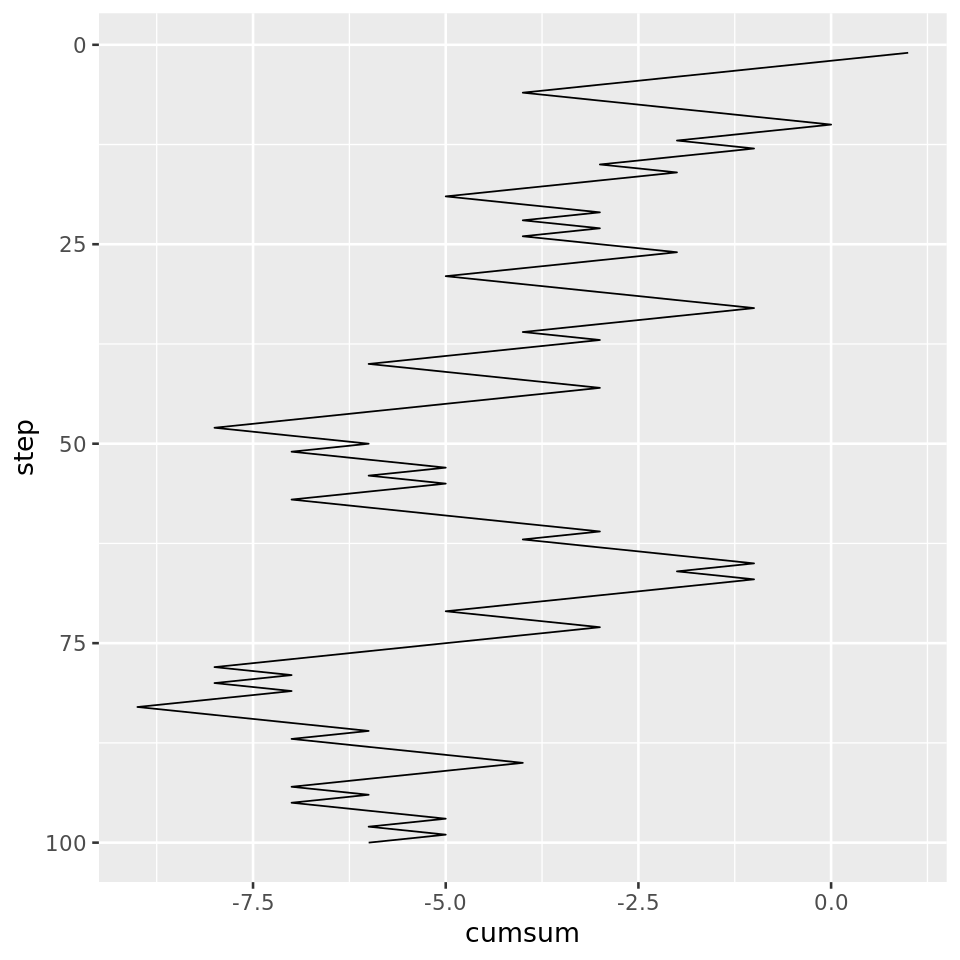

In [3]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

walk_100 %>% 
ggplot(aes(x=cumsum,y=step)) + 
  geom_path() + 
  scale_y_reverse() + # so that y-axis goes from top to bottom
  theme_gray(base_size=16)

Now, let's create a function called `repeat_walk` that can generate multiple runs of the random walk. We will specify that the probability of going left or right is 50/50.

```
repeat_walk(num_replicates = number of replicates
            num_steps = number of steps per replicate
            prob = probability (default is 50:50))
```

In [4]:
repeat_walk <- function(num_replicates, num_steps, prob=c(0.5,0.5)) {
    
    replicate(num_replicates, 
              walk(num_steps, prob), 
              simplify = FALSE) %>%
    bind_rows %>% 
    mutate(replicate=rep(1:num_replicates, each=num_steps)) %>%
    return
}

We can generate a dataset of 1000 replicates of the random walk of 100 steps each

In [5]:
multi_walk <- repeat_walk(num_replicates = 1000, 
                          num_steps = 100)

head(multi_walk)
tail(multi_walk)

step,direction,cumsum,replicate
<int>,<dbl>,<dbl>,<int>
1,1,1,1
2,-1,0,1
3,1,1,1
4,1,2,1
5,1,3,1
6,-1,2,1


step,direction,cumsum,replicate
<int>,<dbl>,<dbl>,<int>
95,-1,-11,1000
96,-1,-12,1000
97,-1,-13,1000
98,-1,-14,1000
99,-1,-15,1000
100,-1,-16,1000


Now, let us look at the paths of the multiple random walks

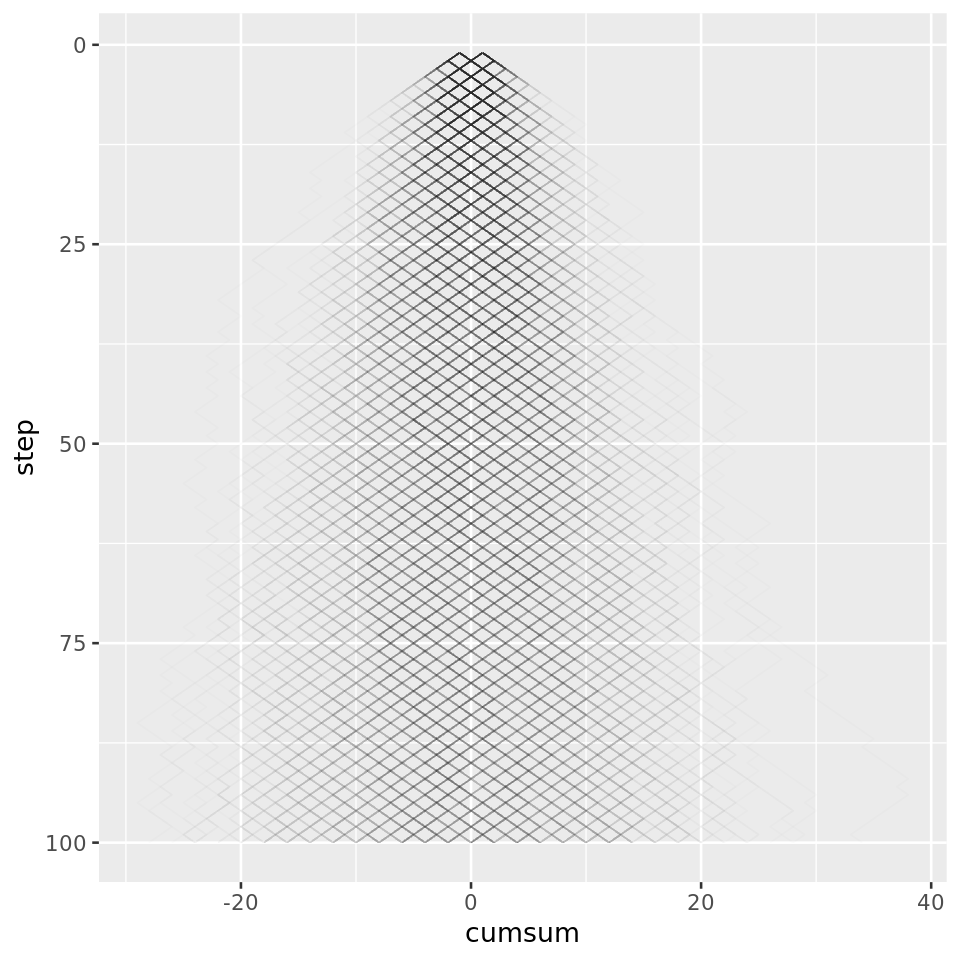

In [6]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

# plot multiple paths of each random walk
multi_walk %>% 
group_by(replicate) %>%  # we specify group_by to plot each path by its replicate number
ggplot(aes(x=cumsum, y=step)) + 
  geom_path(aes(group=replicate),alpha=0.01) +  # the group mapping will plot each path by the replicate number
  scale_y_reverse() +
  theme_grey(base_size=16)

We can plot the distribution of cumulative values at the end of the multiple sets of random walks. This represents the spread of uncertainty around the original value as a result of the accumulation of random deviations

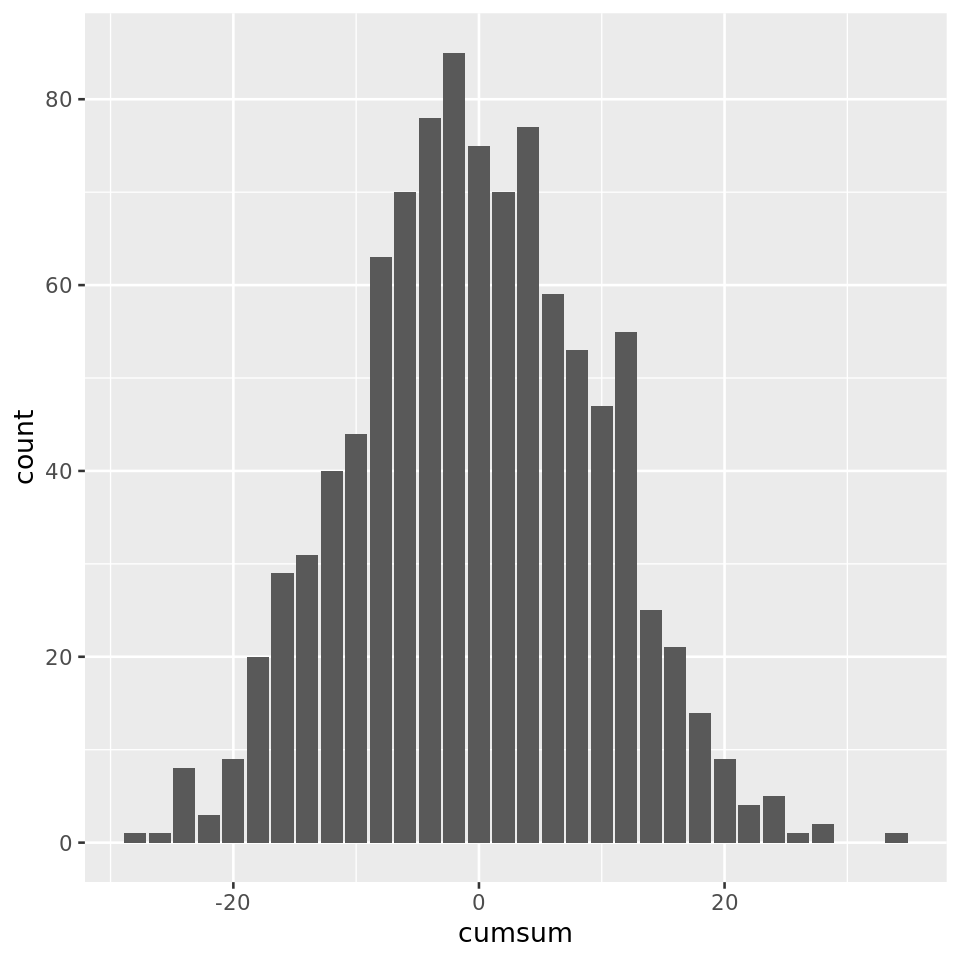

In [7]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

# plot histogram of cumulative values at the end of the random walks

multi_walk %>% 
filter(step==max(step)) %>%  # take only the last step
ggplot(aes(x=cumsum)) +      # plot the cumulative values at the last step
  geom_bar() +
  theme_grey(base_size=16)

Notice that the distribution looks like the familiar bell-shaped curve, which results from the sum of random deviations from an initial value

We can also use a built-in function ```rbinom``` to calculate the values from this process by sampling from a binomial distribution (similar to our `repeat_walk` function)

```
rbinom(number of replicates, 
       number of steps per replicate, 
       probability of success)
```
    

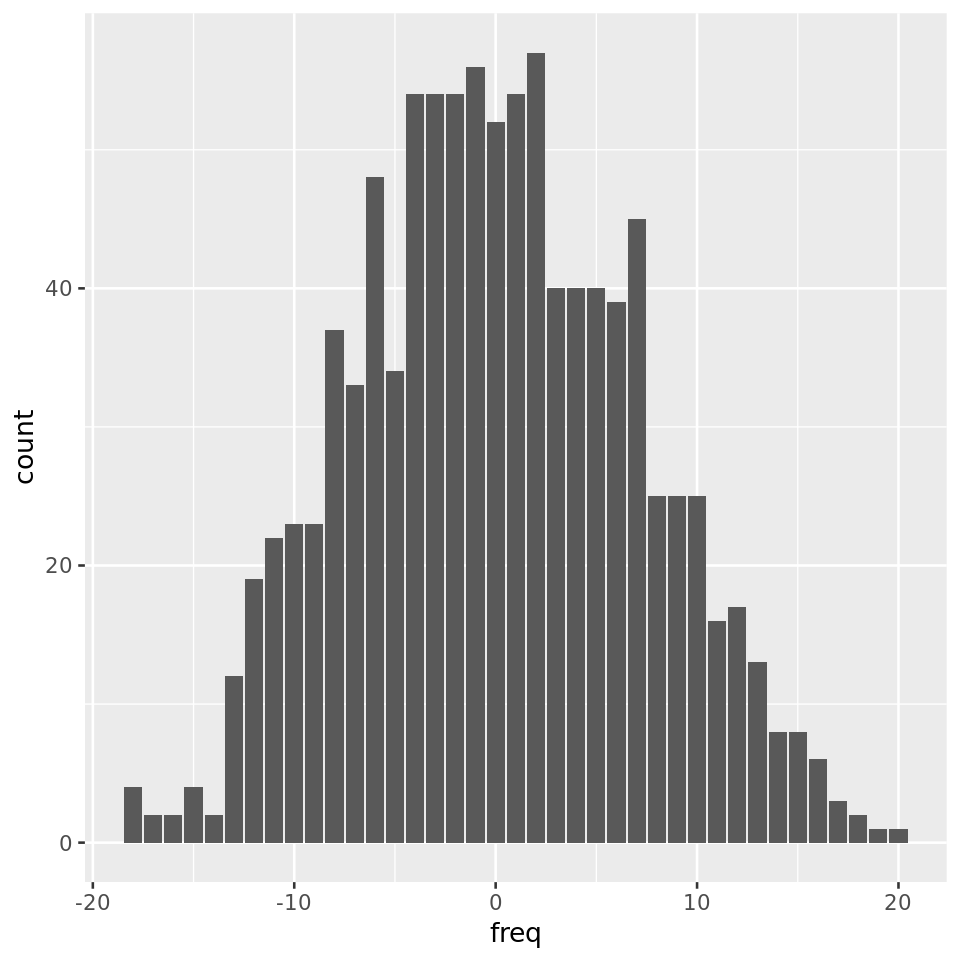

In [8]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

# plot the binomial distribution
tibble(freq=rbinom(1000,200,0.5)-100) %>% # we subtract 100 from the values to center 
ggplot(aes(x=freq)) + 
  geom_bar() +
  theme_grey(base_size=16)

## Playing with an interactive version

https://iwant2study.org/lookangejss/math/ejss_model_GaltonBoardwee/GaltonBoardwee_Simulation.xhtml

## What happens when we increase the number of samples?

We note that the shape of the distribution looks like a normal distribution and we can examine how the shape changes as we increase the number of samples

We will generate different sized samples (1000,10000,100000) from a binomial distribution (similar to cumulative random deviations in a random walk) and plot them 

In [9]:
sample_1 <- tibble(sample=1000, freq=rbinom(1000,200,0.5)-100)
sample_2 <- tibble(sample=10000, freq=rbinom(10000,200,0.5)-100)
sample_3 <- tibble(sample=100000, freq=rbinom(100000,200,0.5)-100)

samples <- bind_rows(sample_1,sample_2,sample_3) # we combine them in 1 tibble

head(samples)
tail(samples)

sample,freq
<dbl>,<dbl>
1000,-4
1000,-1
1000,6
1000,2
1000,4
1000,8


sample,freq
<dbl>,<dbl>
1e+05,1
1e+05,-4
1e+05,14
1e+05,-3
1e+05,11
1e+05,5


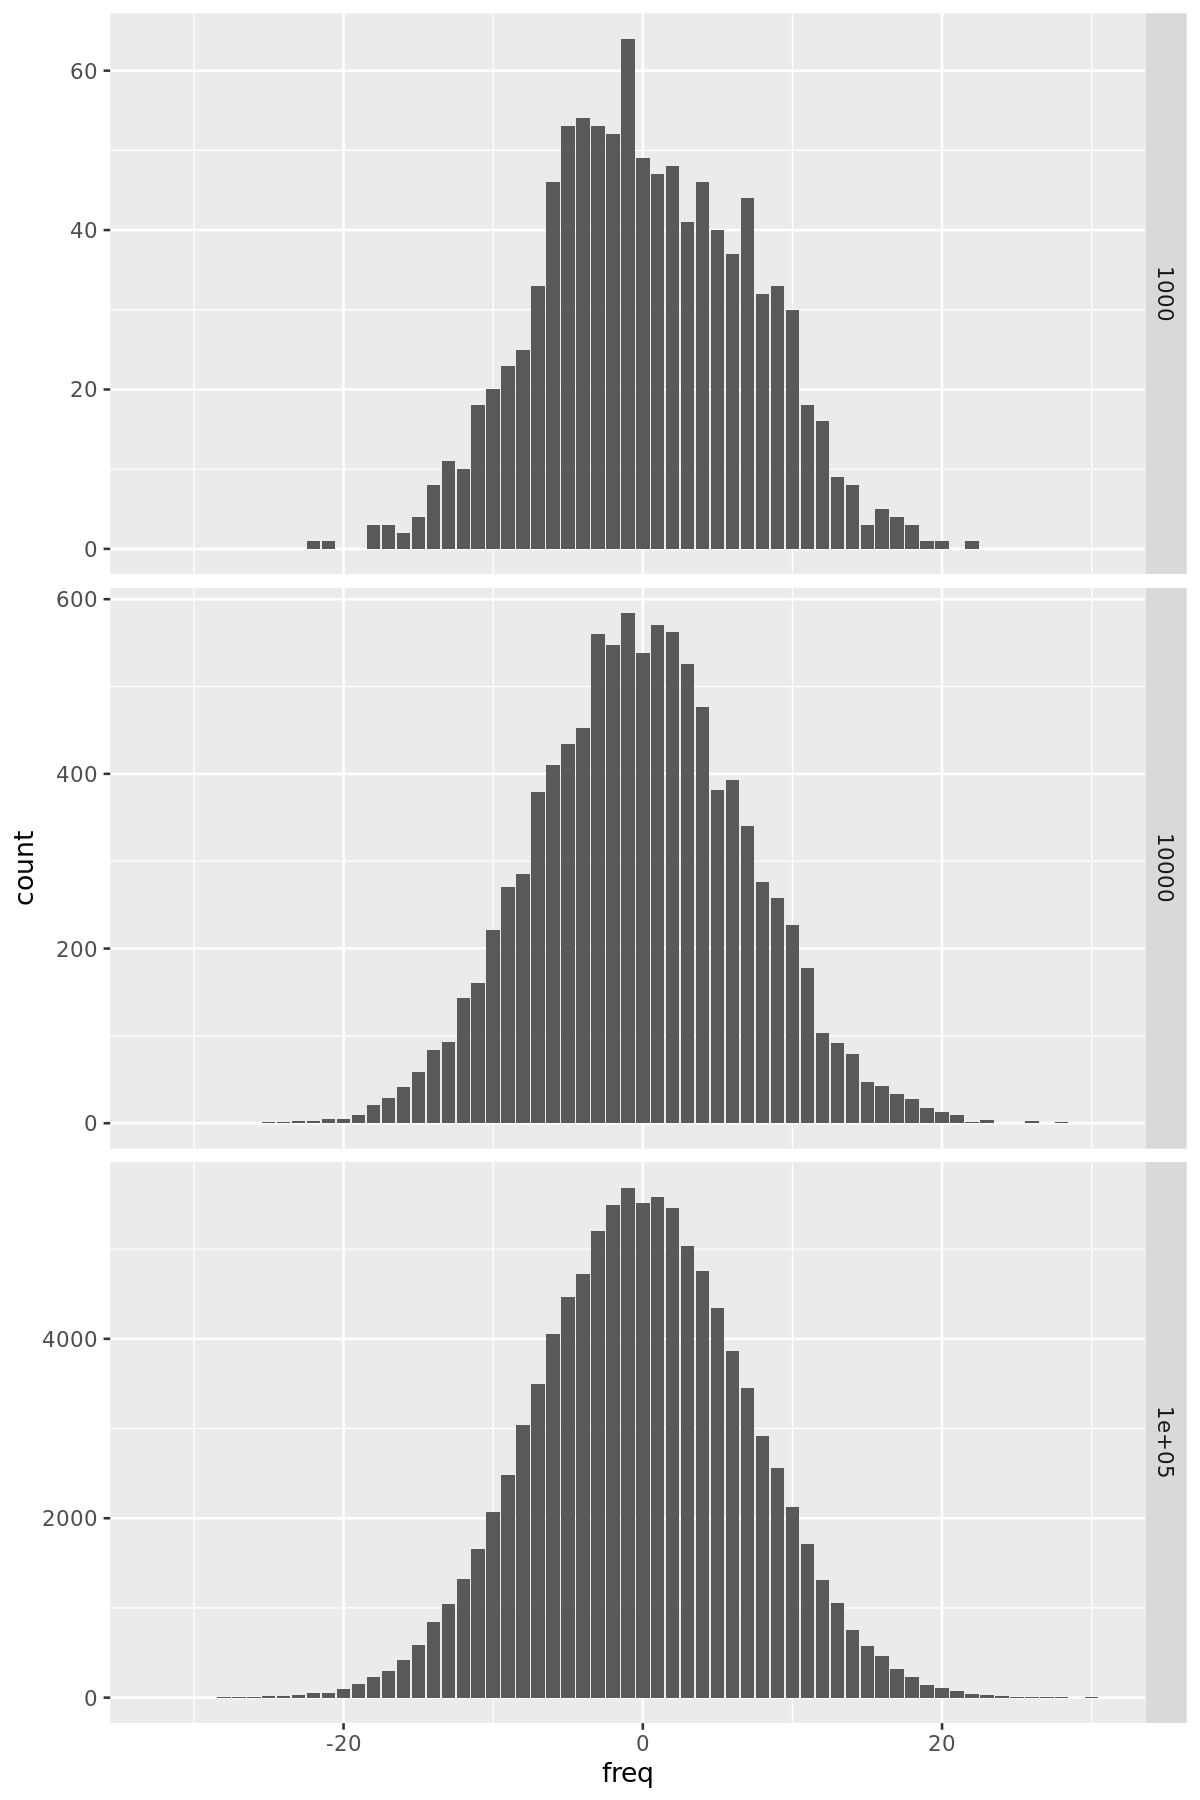

In [10]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=15)

# plot histograms of distributions grouped by sample size
samples %>% 
group_by(sample) %>% 
ggplot(aes(x=freq)) + 
  geom_bar() + 
  facet_grid(sample ~ ., scales="free_y") + # free_y = allow each graph to have their own scale
  theme_grey(base_size=16)

- As you can see, as the number of samples (observations) increases, the shape of the plot becomes more bell-shaped
- Asymptotically, as $n \rightarrow \infty$ the distribution becomes Gaussian/normal (for the curious: http://www.m-hikari.com/imf/imf-2017/9-12-2017/p/baguiIMF9-12-2017.pdf)
- This error distribution is the basis of many statistical inference methods